In [1]:
#TASK 1 PART A AND B
import pandas as pd

d1a = pd.read_csv('Lab2 D1A.csv')
d1b = pd.read_csv('Lab2 D1B.csv')

merged_ab = pd.merge(d1a, d1b, on=['name', 'population', 'county'], how='inner')

if 'level' in merged_ab.columns and 'level.1' in merged_ab.columns:
    merged_ab = merged_ab.drop(columns=['level.1'])

print("Final Shape:", merged_ab.shape)
print("Columns:", list(merged_ab.columns))
merged_ab.head()

Final Shape: (27033, 8)
Columns: ['fid', 'name', 'population', 'county', 'latitude', 'longitude', 'level', 'enrollment']


,fid,name,population,county,latitude,longitude,level,enrollment
0,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,41.758597,-71.175801,Combined elementary and secondary,120
1,9002,SETON ACADEMY FOR GIRLS,57,BRISTOL,41.718407,-71.147302,Elementary,49
2,9003,ST ANNA SCHOOL,157,WORCESTER,42.517271,-71.751741,Elementary,143
3,9004,SOUTHEAST ALTERNATIVE SCHOOL-MIDDLE SCHOOL,5,PLYMOUTH,41.818210,-71.083393,Elementary,4
4,9005,DEVEREUX SCHOOL,123,WORCESTER,42.383875,-71.968419,Combined elementary and secondary,107


In [2]:
#TASK 1 PART C
d1c = pd.read_csv('Lab2 D1C.csv')

combo_ac = pd.merge(d1a, d1c, on='county', how='inner')
combo_ac.to_csv('comboAC.csv', index=False)

print("Combo AC Shape:", combo_ac.shape)
print("Columns:", list(combo_ac.columns))
combo_ac.head()

Combo AC Shape: (4221333, 7)
Columns: ['fid', 'name', 'population', 'county', 'latitude', 'city', 'score']


,fid,name,population,county,latitude,city,score
0,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,41.758597,SWANSEA,16
1,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,41.758597,FALL RIVER,8
2,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,41.758597,NEW BEDFORD,8
3,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,41.758597,MANSFIELD,14
4,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,BRISTOL,41.758597,ATTLEBORO,5


In [3]:
#TASK 2 PART A
import numpy as np

data = {
    'county': ['BRISTOL', 'WORCESTER', 'HAMPDEN', 'ALLEGAN', 'ALGER'],
    'size': ['small', 'medium', 'high', 'medium', 'small'],
    'direction': ['North', 'South', 'East', 'West', 'North'],
    'timings': ['full time', 'part time', 'full time', 'part time', 'full time'],
    'type': ['public', 'private', 'public', 'private', 'public'],
    'budget': [10000, 20000, 30000, 15000, 25000]
}

customizedData = pd.DataFrame(data)
customizedData.to_csv('customizedData.csv', index=False)

print("Custom Shape:", customizedData.shape)
customizedData.head()

Custom Shape: (5, 6)


,county,size,direction,timings,type,budget
0,BRISTOL,small,North,full time,public,10000
1,WORCESTER,medium,South,part time,private,20000
2,HAMPDEN,high,East,full time,public,30000
3,ALLEGAN,medium,West,part time,private,15000
4,ALGER,small,North,full time,public,25000


In [4]:
#TASK 2 B PART
# Load all
d1a = pd.read_csv('Lab2 D1A.csv')
d1b = pd.read_csv('Lab2 D1B.csv')
d1c = pd.read_csv('Lab2 D1C.csv')
custom = pd.read_csv('customizedData.csv')

print("Before Merging Shapes:")
print("Custom:", custom.shape)
print("D1A:", d1a.shape)
print("D1B:", d1b.shape)
print("D1C:", d1c.shape)

modifiedData = custom.merge(d1a, on='county', how='inner')
modifiedData = modifiedData.merge(d1b, on=['county'], how='inner')
modifiedData = modifiedData.merge(d1c, on='county', how='inner')

modifiedData.to_csv('modifiedData.csv', index=False)

print("\nAfter Merging Shape:", modifiedData.shape)
modifiedData.head()

Before Merging Shapes:
Custom: (5, 6)
D1A: (26983, 5)
D1B: (26983, 7)
D1C: (26983, 3)

After Merging Shape: (1207171, 18)


,county,size,direction,timings,type,budget,fid,name_x,population_x,latitude,name_y,population_y,longitude,level,enrollment,level.1,city,score
0,BRISTOL,small,North,full time,public,10000,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,41.758597,NEW ENGLAND CHRISTIAN ACADEMY,136,-71.175801,Combined elementary and secondary,120,Combined elementary and secondary,SWANSEA,16
1,BRISTOL,small,North,full time,public,10000,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,41.758597,NEW ENGLAND CHRISTIAN ACADEMY,136,-71.175801,Combined elementary and secondary,120,Combined elementary and secondary,FALL RIVER,8
2,BRISTOL,small,North,full time,public,10000,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,41.758597,NEW ENGLAND CHRISTIAN ACADEMY,136,-71.175801,Combined elementary and secondary,120,Combined elementary and secondary,NEW BEDFORD,8
3,BRISTOL,small,North,full time,public,10000,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,41.758597,NEW ENGLAND CHRISTIAN ACADEMY,136,-71.175801,Combined elementary and secondary,120,Combined elementary and secondary,MANSFIELD,14
4,BRISTOL,small,North,full time,public,10000,9001,NEW ENGLAND CHRISTIAN ACADEMY,136,41.758597,NEW ENGLAND CHRISTIAN ACADEMY,136,-71.175801,Combined elementary and secondary,120,Combined elementary and secondary,ATTLEBORO,5


Correlation Matrix:
                              var3     var38     var15  imp_op_var39_comer_ult1
var3                     1.000000  0.000071 -0.004452                 0.005989
var38                    0.000071  1.000000  0.006497                 0.012546
var15                   -0.004452  0.006497  1.000000                 0.094762
imp_op_var39_comer_ult1  0.005989  0.012546  0.094762                 1.000000


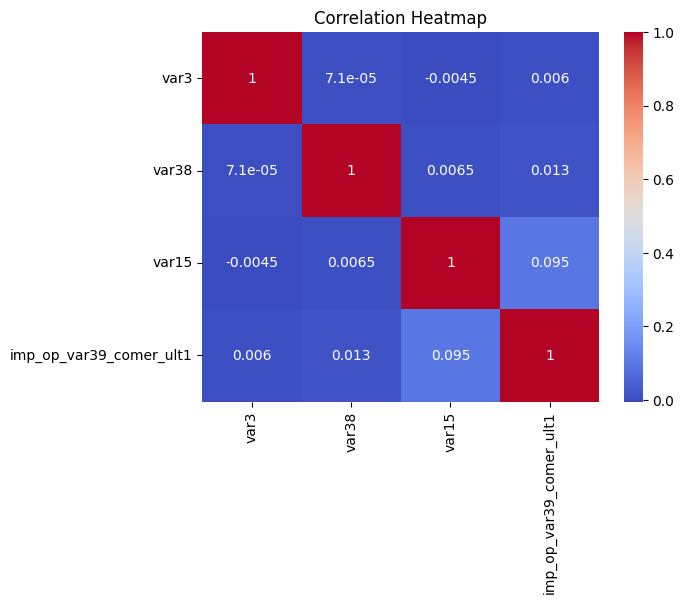

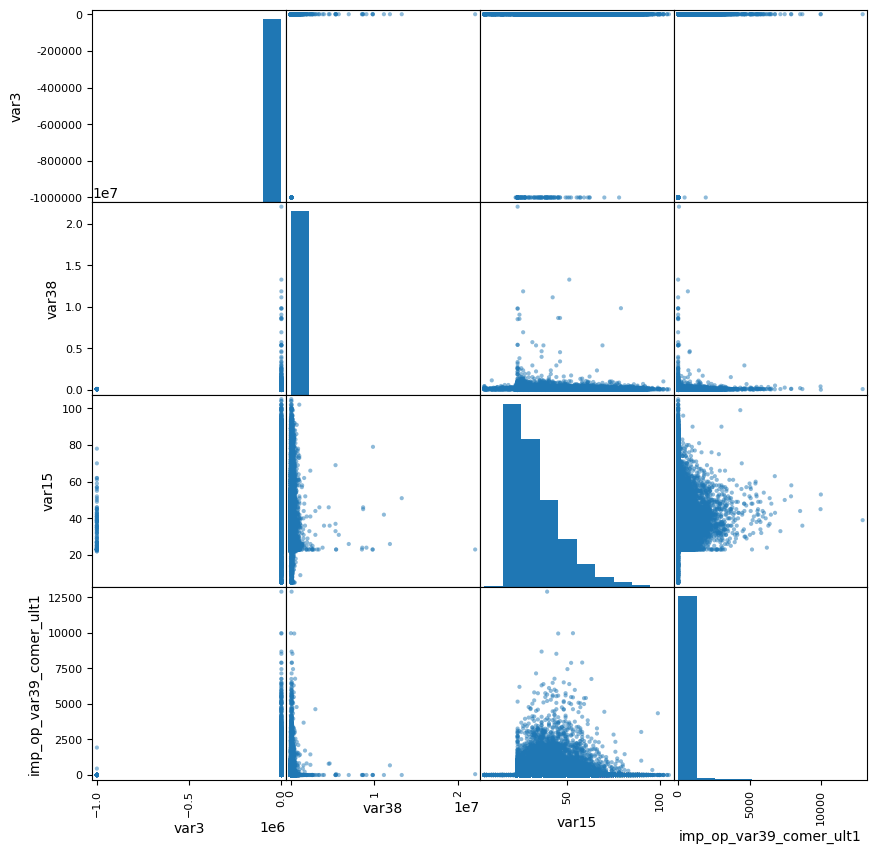

Total Missing: 0


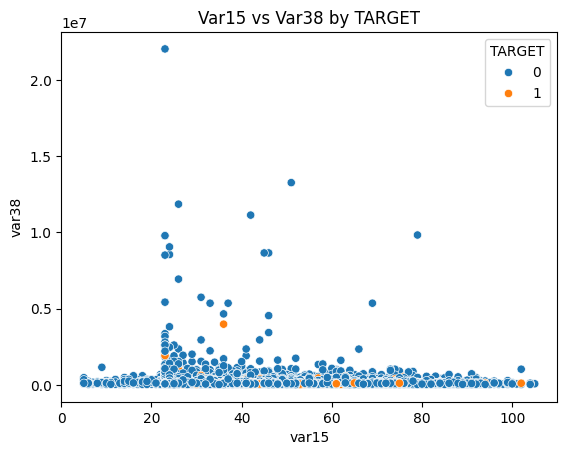

          var15                                                         var38  \
          count       mean        std   min   25%   50%   75%    max    count   
TARGET                                                                          
0       73012.0  32.946406  12.924444   5.0  23.0  27.0  39.0  105.0  73012.0   
1        3008.0  39.680519  12.020518  23.0  30.0  38.0  47.0  102.0   3008.0   

                                                                       \
                 mean            std       min         25%        50%   
TARGET                                                                  
0       117959.156918  185100.867998   5163.75  68432.7375  107207.82   
1        99678.280590  106309.811490  11136.63  57160.9425   86219.97   

                                    
                  75%          max  
TARGET                              
0       119742.270000  22034738.76  
1       117310.979016   3988595.10  


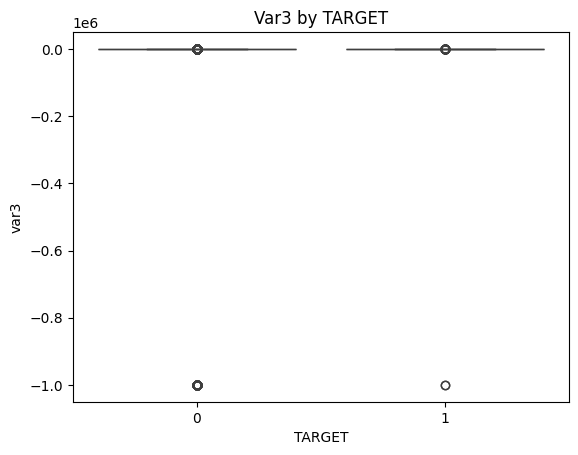

          count         mean           std       min  25%  50%  75%    max
TARGET                                                                    
0       73012.0 -1558.651989  39483.871421 -999999.0  2.0  2.0  2.0  238.0
1        3008.0  -662.669548  25781.275174 -999999.0  2.0  2.0  2.0  142.0


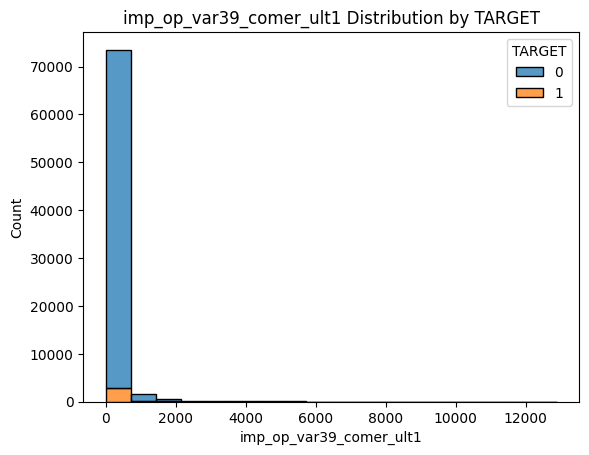

          count       mean         std  min  25%  50%  75%       max
TARGET                                                              
0       73012.0  71.650026  332.942974  0.0  0.0  0.0  0.0   9968.04
1        3008.0  89.670439  467.849987  0.0  0.0  0.0  0.0  12888.03


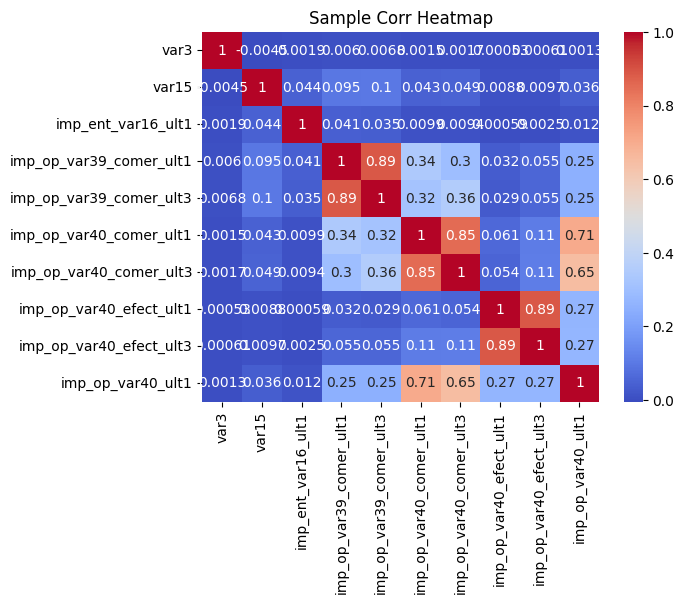

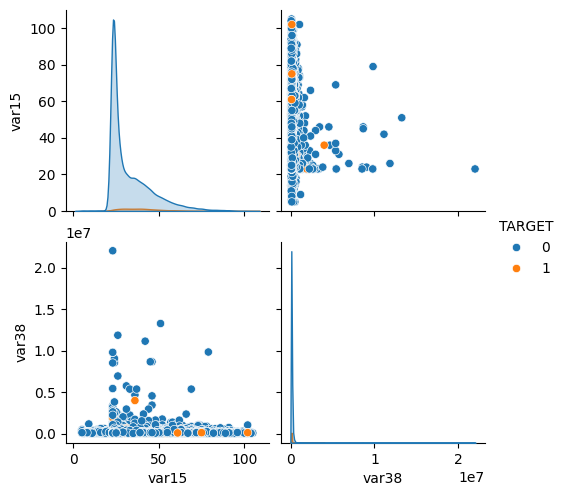

Unique TARGET: [0 1]
Value Counts:
 TARGET
0    0.960431
1    0.039569
Name: proportion, dtype: float64
Balanced Value Counts:
 TARGET
0    73012
1    73012
Name: count, dtype: int64
Original Records: 76020 Features: 369
After Selection Features: 125
Selected Features: 100


In [9]:
#TASK 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, f_classif
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

#PART B
train = pd.read_csv('train.csv')

#PART C
corr = train[['var3', 'var38', 'var15', 'imp_op_var39_comer_ult1']].corr()
print("Correlation Matrix:\n", corr)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#PART D
pd.plotting.scatter_matrix(train[['var3', 'var38', 'var15', 'imp_op_var39_comer_ult1']], figsize=(10,10))
plt.show()

#PART E
print("Total Missing:", train.isnull().sum().sum())

#PART F
#i Var15 vs Var38 by TARGET (Scatter, numerical summary)
sns.scatterplot(x='var15', y='var38', hue='TARGET', data=train)
plt.title('Var15 vs Var38 by TARGET')
plt.show()
print(train.groupby('TARGET')[['var15', 'var38']].describe())

#ii Boxplot Var3 by TARGET
sns.boxplot(x='TARGET', y='var3', data=train)
plt.title('Var3 by TARGET')
plt.show()
print(train.groupby('TARGET')['var3'].describe())

#iii Histogram imp_op_var39_comer_ult1 by TARGET
sns.histplot(data=train, x='imp_op_var39_comer_ult1', hue='TARGET', multiple='stack')
plt.title('imp_op_var39_comer_ult1 Distribution by TARGET')
plt.show()
print(train.groupby('TARGET')['imp_op_var39_comer_ult1'].describe())

#iv Corr Heatmap for 10 vars
sample_vars = train.columns[1:11]
sns.heatmap(train[sample_vars].corr(), annot=True, cmap='coolwarm')
plt.title('Sample Corr Heatmap')
plt.show()

#v Pairplot for key vars
sns.pairplot(train[['var15', 'var38', 'TARGET']], hue='TARGET')
plt.show()

#PART G
print("Unique TARGET:", train['TARGET'].unique())
print("Value Counts:\n", train['TARGET'].value_counts(normalize=True))

#PART H
majority = train[train['TARGET'] == 0]
minority = train[train['TARGET'] == 1]

minority_up = resample(minority, replace=True, n_samples=len(majority), random_state=42)
balanced = pd.concat([majority, minority_up])

print("Balanced Value Counts:\n", balanced['TARGET'].value_counts())

#PART I
print("Original Records:", train.shape[0], "Features:", train.shape[1]-2)

corr_matrix = train.drop(columns=['ID', 'TARGET']).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.65)]
selected = train.drop(columns=to_drop)

print("After Selection Features:", selected.shape[1]-2)

#PART J
train_copy = train.copy()

X = train_copy.drop(columns=['ID', 'TARGET'])
y = train_copy['TARGET']

selector = SelectKBest(f_classif, k=100)
X_selected = selector.fit_transform(X, y)

print("Selected Features:", X_selected.shape[1])




Survey Shape: (100, 10)
              Age  Hours_Week  Satisfaction
count  100.000000  100.000000    100.000000
mean    28.660000   12.319505      4.860000
std      6.390049    4.142906      2.902524
min     18.000000    5.215902      1.000000
25%     24.000000    9.164877      2.000000
50%     29.000000   12.789077      5.000000
75%     34.000000   15.531443      7.000000
max     39.000000   19.637781     10.000000


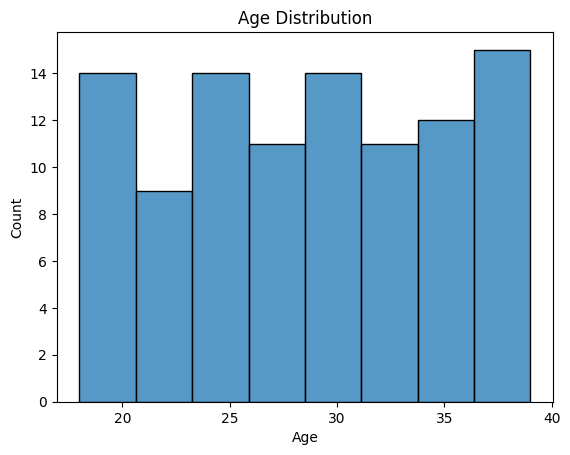

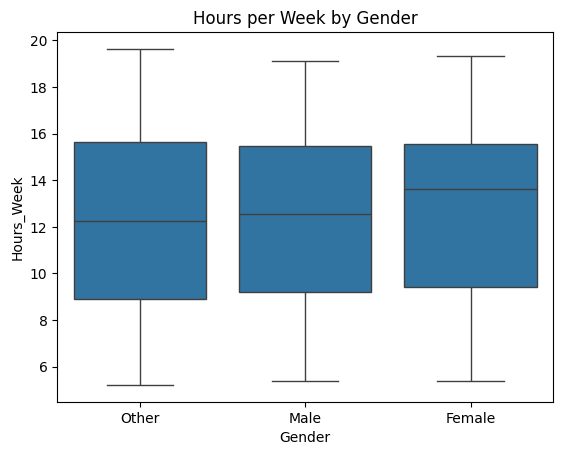

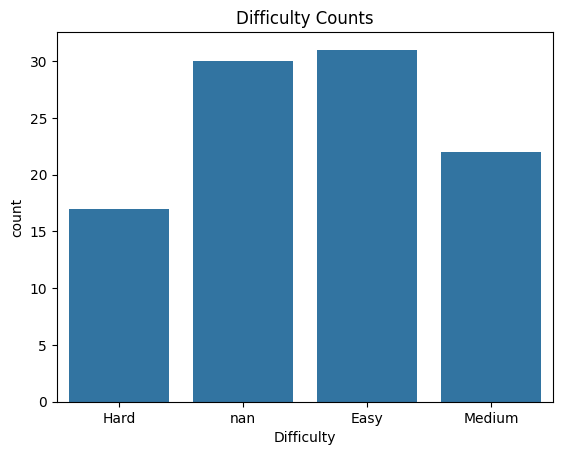

Difficulty Balance:
 Difficulty
Easy      0.31
nan       0.30
Medium    0.22
Hard      0.17
Name: proportion, dtype: float64
Missing:
 Age              0
Gender           0
Education        0
Learning_Time    0
Hours_Week       0
ML_Tool          0
Mode             0
Difficulty       0
Satisfaction     0
Suggestions      0
dtype: int64
After Impute Missing: 0
Balanced Difficulty:
 Difficulty
nan       30
Medium    22
Easy      17
Hard      17
Name: count, dtype: int64
         Feature  MI Score
4     Hours_Week  0.064982
6           Mode  0.056804
3  Learning_Time  0.049038
0            Age  0.000000
2      Education  0.000000
1         Gender  0.000000
5        ML_Tool  0.000000
7     Difficulty  0.000000
Duplicates: 0
After Drop Shape: (86, 10)
After Subset Drop Shape: (86, 10)


In [8]:
#Task 4
#PART A AND B
np.random.seed(42)
data = {
    'Age': np.random.randint(18, 40, 100),
    'Gender': np.random.choice(['Male', 'Female', 'Other'], 100),
    'Education': np.random.choice(['High School', 'Undergrad', 'Grad', 'PhD'], 100),
    'Learning_Time': np.random.choice(['Morning', 'Afternoon', 'Evening'], 100),
    'Hours_Week': np.random.uniform(5, 20, 100),
    'ML_Tool': np.random.choice(['Python', 'R', 'Other', np.nan], 100),
    'Mode': np.random.choice(['Online', 'In-Person', 'Hybrid', np.nan], 100),
    'Difficulty': np.random.choice(['Easy', 'Medium', 'Hard', np.nan], 100),
    'Satisfaction': np.random.randint(1, 11, 100),
    'Suggestions': np.random.choice(['None', 'More labs', np.nan], 100)
}

survey_df = pd.DataFrame(data)
survey_df.to_csv('survey_data.csv', index=False)

print("Survey Shape:", survey_df.shape)
survey_df.head()

#PART C
print(survey_df.describe())

sns.histplot(survey_df['Age'])
plt.title('Age Distribution')
plt.show()

sns.boxplot(x='Gender', y='Hours_Week', data=survey_df)
plt.title('Hours per Week by Gender')
plt.show()

sns.countplot(x='Difficulty', data=survey_df)
plt.title('Difficulty Counts')
plt.show()

print("Difficulty Balance:\n", survey_df['Difficulty'].value_counts(normalize=True))

#PART D
print("Missing:\n", survey_df.isnull().sum())

survey_df['ML_Tool'] = survey_df['ML_Tool'].fillna(survey_df['ML_Tool'].mode()[0])
survey_df['Mode'] = survey_df['Mode'].fillna(survey_df['Mode'].mode()[0])
survey_df['Difficulty'] = survey_df['Difficulty'].fillna(survey_df['Difficulty'].mode()[0])
survey_df['Suggestions'] = survey_df['Suggestions'].fillna('No suggestion')

print("After Impute Missing:", survey_df.isnull().sum().sum())

#PART E
value_counts = survey_df['Difficulty'].value_counts()
major_class = value_counts.idxmax()
min_size = value_counts.min()

major = survey_df[survey_df['Difficulty'] == major_class]
major_down = resample(major, replace=False, n_samples=min_size, random_state=42)

minor_dfs = [survey_df[survey_df['Difficulty'] == c] for c in value_counts.index if c != major_class]
balanced_survey = pd.concat([major_down] + minor_dfs)

print("Balanced Difficulty:\n", balanced_survey['Difficulty'].value_counts())

#PART F
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Gender', 'Education', 'Learning_Time', 'ML_Tool', 'Mode', 'Difficulty']:
    balanced_survey[col] = le.fit_transform(balanced_survey[col].astype(str))

X = balanced_survey.drop(columns=['Satisfaction', 'Suggestions'])
y = pd.cut(balanced_survey['Satisfaction'], bins=3, labels=[0,1,2])

mi_scores = mutual_info_regression(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values('MI Score', ascending=False)

print(mi_df)

# Select top 5
selected_features = mi_df.head(5)['Feature'].tolist()

#PART G
dummies = pd.get_dummies(balanced_survey[['Gender', 'Education']], drop_first=True)
balanced_survey = pd.concat([balanced_survey.drop(columns=['Gender', 'Education']), dummies], axis=1)

balanced_survey.head()

#PART H
print("Duplicates:", balanced_survey.duplicated().sum())

no_dups1 = balanced_survey.drop_duplicates()
print("After Drop Shape:", no_dups1.shape)

no_dups2 = balanced_survey.drop_duplicates(subset=['Age', 'Hours_Week'])
print("After Subset Drop Shape:", no_dups2.shape)